### Project description.

The essence of the project is to track the impact of living conditions of students aged 15 to 22 on their performance in mathematics in order to identify students at an early stage at risk.
This can be done using a model that would predict the results of the state exam in mathematics for each student of the school. To determine the parameters of the future model, it is necessary to conduct an exploratory analysis of the data and draw up a report on its results.

Well, let's get started!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations

In [2]:
students = pd.read_csv('data/stud_math.csv')

In [3]:
students.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

'studytime, granular'... WTF??

In [4]:
students.loc[:, ['studytime', 'studytime, granular']]

studytime  studytime, granular
0          2.0                 -6.0
1          2.0                 -6.0
2          2.0                 -6.0
3          3.0                 -9.0
4          2.0                 -6.0
..         ...                  ...
390        2.0                 -6.0
391        1.0                 -3.0
392        1.0                 -3.0
393        1.0                 -3.0
394        1.0                 -3.0

[395 rows x 2 columns]

In [5]:
students.studytime.unique()

array([ 2.,  3.,  1., nan,  4.])

In [6]:
students['studytime, granular'].unique()

array([ -6.,  -9.,  -3.,  nan, -12.])

Hmm... it looks like one reflects the other, let's try to look at the Pearson correlation

*Note: In general, the Pearson correlation coefficient is not applicable to the ordinal level of the data, but in this case we need to find out if one reflects the other in order to eliminate unnecessary things. Therefore, use is possible here.*

In [7]:
students.loc[:, ['studytime', 'studytime, granular']].corr()

studytime  studytime, granular
studytime                  1.0                 -1.0
studytime, granular       -1.0                  1.0

Cool! Now we can away this ugly thing.

In [8]:
students.drop(columns='studytime, granular', inplace=True)

In [9]:
students.rename(columns={
    'Pstatus': 'parent_status',
    'Medu': 'mother_edu',
    'Fedu': 'father_edu',
    'Mjob': 'mother_job',
    'Fjob': 'father_job'}, inplace=True)
students.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'parent_status',
       'mother_edu', 'father_edu', 'mother_job', 'father_job', 'reason',
       'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup',
       'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet',
       'romantic', 'famrel', 'freetime', 'goout', 'health', 'absences',
       'score'],
      dtype='object')

In [10]:
students.head()

school sex  age address famsize parent_status  mother_edu  father_edu  \
0     GP   F   18       U     NaN             A         4.0         4.0   
1     GP   F   17       U     GT3           NaN         1.0         1.0   
2     GP   F   15       U     LE3             T         1.0         1.0   
3     GP   F   15       U     GT3             T         4.0         2.0   
4     GP   F   16       U     GT3             T         3.0         3.0   

  mother_job father_job  ... nursery higher  internet  romantic  famrel  \
0    at_home    teacher  ...     yes    yes       NaN        no     4.0   
1    at_home      other  ...      no    yes       yes        no     5.0   
2    at_home      other  ...     yes    yes       yes       NaN     4.0   
3     health        NaN  ...     yes    yes       yes       yes     3.0   
4      other      other  ...     yes    yes        no        no     4.0   

  freetime goout health absences score  
0      3.0   4.0    3.0      6.0  30.0  
1      3.0   3.0    3.0      4.0  30.0  
2      3.0   2.0    3.0     10.0  50.0  
3      2.0   2.0    5.0      2.0  75.0  
4      3.0   2.0    5.0      4.0  50.0  

[5 rows x 29 columns]

In [11]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   school         395 non-null    object 
 1   sex            395 non-null    object 
 2   age            395 non-null    int64  
 3   address        378 non-null    object 
 4   famsize        368 non-null    object 
 5   parent_status  350 non-null    object 
 6   mother_edu     392 non-null    float64
 7   father_edu     371 non-null    float64
 8   mother_job     376 non-null    object 
 9   father_job     359 non-null    object 
 10  reason         378 non-null    object 
 11  guardian       364 non-null    object 
 12  traveltime     367 non-null    float64
 13  studytime      388 non-null    float64
 14  failures       373 non-null    float64
 15  schoolsup      386 non-null    object 
 16  famsup         356 non-null    object 
 17  paid           355 non-null    object 
 18  activities

#### Let's see what's up with the missing values.

In [12]:
# fraction of missing values for each column
round(students.isna().sum().sort_values(ascending=False)/len(students), 2)

parent_status    0.11
paid             0.10
famsup           0.10
father_job       0.09
internet         0.09
romantic         0.08
guardian         0.08
traveltime       0.07
famsize          0.07
famrel           0.07
father_edu       0.06
failures         0.06
higher           0.05
mother_job       0.05
address          0.04
reason           0.04
nursery          0.04
health           0.04
activities       0.04
absences         0.03
freetime         0.03
schoolsup        0.02
goout            0.02
studytime        0.02
score            0.02
mother_edu       0.01
age              0.00
sex              0.00
school           0.00
dtype: float64

In [13]:
# fraction of missing values for the total dataframe
round(students.isna().sum().sum()/(students.shape[0]*students.shape[1]), 2)

0.05

*Well, in general, there are quite a few missing values in the dataframe - about 5%. Most of the gaps, about 11%, are in the "parent_status" column.*

We can also formulate a general primary view of the data using a special analysis tool - Pandas Profiling. It's quick and enjoyable.

In [14]:
from pandas_profiling import ProfileReport
profile = ProfileReport(students, title="Pandas Profiling Report")
profile

In [15]:
students.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'parent_status',
       'mother_edu', 'father_edu', 'mother_job', 'father_job', 'reason',
       'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup',
       'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet',
       'romantic', 'famrel', 'freetime', 'goout', 'health', 'absences',
       'score'],
      dtype='object')

In [16]:
# classify variables into quantitative and categorical
quantitative_vars = ['age', 'absences', 'score']
categorical_vars = [
    'school', 'sex', 'address', 'famsize', 'parent_status', 'mother_edu', 'father_edu',
    'mother_job', 'father_job', 'reason', 'guardian', 'traveltime', 'studytime',
    'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
    'higher', 'internet', 'romantic', 'famrel',
    'freetime', 'goout', 'health']

#### Let's take a closer look at each variable

In [17]:
students.school.value_counts()

GP    349
MS     46
Name: school, dtype: int64

*Two schools took part in the study. Most of the students are from the school named "GP".*

In [18]:
students.sex.value_counts()

F    208
M    187
Name: sex, dtype: int64

*There are slightly more girls than boys.*

In [19]:
students.age.describe()

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

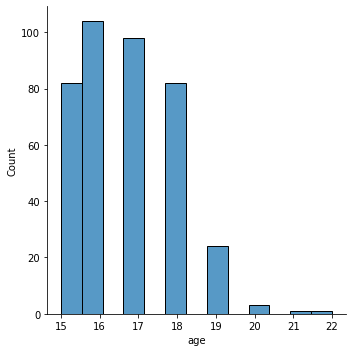

In [20]:
sns.displot(students.age)

*Age contains no anomalies. The age distribution is asymmetric with a positive skew. This means that more young students took part in the study. This is also confirmed by the mean and median values.*

In [21]:
students.address.value_counts(dropna=False)

U      295
R       83
NaN     17
Name: address, dtype: int64

*Many more urban students took part in the study.*

In [22]:
students.famsize.value_counts(dropna=False)

GT3    261
LE3    107
NaN     27
Name: famsize, dtype: int64

*Most families have more than three children.*

In [23]:
students.parent_status.value_counts(dropna=False)

T      314
NaN     45
A       36
Name: parent_status, dtype: int64

*Most of the students are from complete families.*

In [24]:
students.mother_edu.value_counts(dropna=False)

4.0    131
2.0    102
3.0     97
1.0     59
0.0      3
NaN      3
Name: mother_edu, dtype: int64

*Almost all mothers of students are educated. Most of them have higher education.*

In [25]:
students.father_edu.value_counts(dropna=False)

2.0     106
3.0      96
4.0      88
1.0      78
NaN      24
0.0       2
40.0      1
Name: father_edu, dtype: int64

*Most of the fathers of the students are educated. Most of them have completed secondary education. Also we can notice that, on average, the mothers of students are more educated than their fathers.*

*Note: One anomalous value was found. Let's set this outlier to NaN instead of excluding it from the sample. This will allow us to store other information from this observation.*

In [26]:
students.loc[students.father_edu == 40.0, 'father_edu'] = np.nan

In [27]:
students.mother_job.value_counts(dropna=False)

other       133
services     98
at_home      58
teacher      55
health       32
NaN          19
Name: mother_job, dtype: int64

In [28]:
students.father_job.value_counts(dropna=False)

other       197
services    102
NaN          36
teacher      29
at_home      16
health       15
Name: father_job, dtype: int64

In [29]:
students.reason.value_counts(dropna=False)

course        137
home          104
reputation    103
other          34
NaN            17
Name: reason, dtype: int64

*The school is mainly chosen for its educational course.*

In [30]:
students.guardian.value_counts(dropna=False)

mother    250
father     86
NaN        31
other      28
Name: guardian, dtype: int64

*The mother is the guardian of most students.*

In [31]:
students.traveltime.value_counts(dropna=False)

1.0    242
2.0     96
NaN     28
3.0     22
4.0      7
Name: traveltime, dtype: int64

*Most students live 15 minutes from the school.*

In [32]:
students.studytime.value_counts(dropna=False)

2.0    194
1.0    103
3.0     64
4.0     27
NaN      7
Name: studytime, dtype: int64

*Most students spend 2 to 5 hours in extra classes.*

In [33]:
students.failures.value_counts(dropna=False)

0.0    293
1.0     49
NaN     22
2.0     16
3.0     15
Name: failures, dtype: int64

*Strictly formally, most students had more than 3 extracurricular failures or none at all. In general, this is a rather strange variable as a feature. However, we see a decreasing nature of the frequency with increasing order (49 > 16 > 15 > ...), so we can draw the following conclusion: most students did not have extracurricular failures.*

In [34]:
students.schoolsup.value_counts(dropna=False)

no     335
yes     51
NaN      9
Name: schoolsup, dtype: int64

*Most students do not have additional educational support.*

In [35]:
students.famsup.value_counts(dropna=False)

yes    219
no     137
NaN     39
Name: famsup, dtype: int64

*Most students have family educational support.*

In [36]:
students.paid.value_counts(dropna=False)

no     200
yes    155
NaN     40
Name: paid, dtype: int64

*Most students do not have additional paid mathematics classes.*

In [37]:
students.activities.value_counts(dropna=False)

yes    195
no     186
NaN     14
Name: activities, dtype: int64

*About half of the students have additional extracurricular activities.*

In [38]:
students.schoolsup.value_counts(dropna=False)

no     335
yes     51
NaN      9
Name: schoolsup, dtype: int64

In [39]:
students.nursery.value_counts(dropna=False)

yes    300
no      79
NaN     16
Name: nursery, dtype: int64

*Most of the students attended nursery.*

In [40]:
students.higher.value_counts(dropna=False)

yes    356
NaN     20
no      19
Name: higher, dtype: int64

*Almost all students want to pursue higher education.*

In [41]:
students.internet.value_counts(dropna=False)

yes    305
no      56
NaN     34
Name: internet, dtype: int64

*Most of the students have the Internet at home.*

In [42]:
students.romantic.value_counts(dropna=False)

no     240
yes    124
NaN     31
Name: romantic, dtype: int64

*Most students are not in a romantic relationship.*

In [43]:
students.famrel.value_counts(dropna=False)

 4.0    182
 5.0     99
 3.0     62
 NaN     27
 2.0     17
 1.0      7
-1.0      1
Name: famrel, dtype: int64

*Most students have good family relationships. There is one anomalous observation. For the above reasons, we also convert this outlier to NaN.*

In [44]:
students.loc[students.famrel == -1.0, 'famrel'] = np.nan

In [45]:
students.freetime.value_counts(dropna=False)

3.0    153
4.0    112
2.0     63
5.0     38
1.0     18
NaN     11
Name: freetime, dtype: int64

*Most students have enough free time.*

In [46]:
students.goout.value_counts(dropna=False)

3.0    127
2.0    101
4.0     84
5.0     52
1.0     23
NaN      8
Name: goout, dtype: int64

*Most students have enough time to chat with friends.*

In [47]:
students.health.value_counts(dropna=False)

5.0    138
3.0     89
4.0     63
1.0     47
2.0     43
NaN     15
Name: health, dtype: int64

*Most of the students are in very good health.*

In [48]:
students.absences.describe()

count    383.000000
mean       7.279373
std       23.465197
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

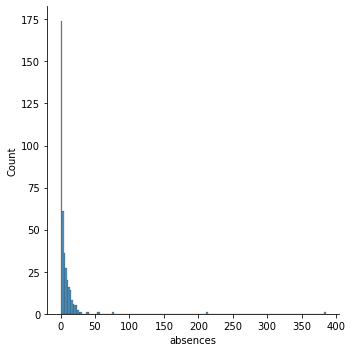

In [49]:
sns.displot(students.absences)

<AxesSubplot:xlabel='absences'>

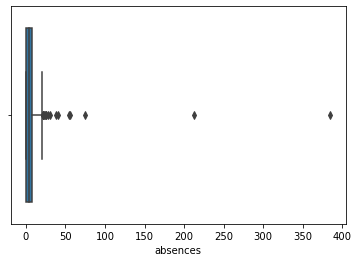

In [50]:
sns.boxplot(x=students.absences)

*The variable has explicit outliers. We use the information about quantiles to discard them.*

In [51]:
q1 = students.absences.quantile(q=0.25, interpolation='midpoint')
q3 = students.absences.quantile(q=0.75, interpolation='midpoint')
iqr = q3 - q1
limit = q3 + 1.5*iqr    # we have one side (only positive values)
students = students[students.absences <= limit]    # exclude outliers

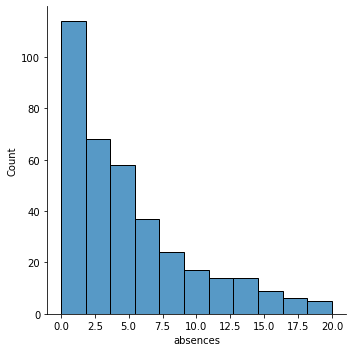

In [52]:
sns.displot(students.absences)

*Most students do not miss classes. Next, we see an asymptotic decrease.*

In [53]:
students.score.describe()

count    361.000000
mean      51.994460
std       22.956117
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

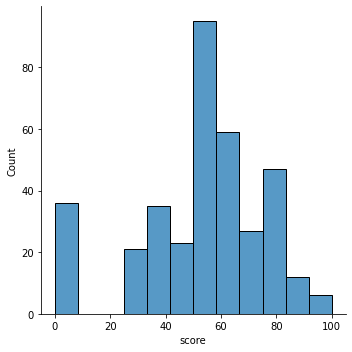

In [54]:
sns.displot(students.score)

*We do not see values between 0 and 25. Is there a reason for Seaborn default bins or is there really no value? Let's check it out.*

In [55]:
students.score.value_counts().sort_index()

0.0      36
25.0      7
30.0     14
35.0      9
40.0     26
45.0     23
50.0     53
55.0     42
60.0     29
65.0     30
70.0     27
75.0     31
80.0     16
85.0      3
90.0      9
95.0      5
100.0     1
Name: score, dtype: int64

*Well, we really see that there are no values between 0 and 25, while the rest (from 25 to 100) values are present in increments of 5. Apparently, this is due to the peculiarity of the exam tests.*

Encode yes/no binaries to 1/0.

In [56]:
students.schoolsup = students.schoolsup.apply(
    lambda x: 1 if x == 'yes' else 0 if x == 'no' else np.nan)
students.famsup = students.famsup.apply(
    lambda x: 1 if x == 'yes' else 0 if x == 'no' else np.nan)
students.paid = students.paid.apply(
    lambda x: 1 if x == 'yes' else 0 if x == 'no' else np.nan)
students.activities = students.activities.apply(
    lambda x: 1 if x == 'yes' else 0 if x == 'no' else np.nan)
students.nursery = students.nursery.apply(
    lambda x: 1 if x == 'yes' else 0 if x == 'no' else np.nan)
students.higher = students.higher.apply(
    lambda x: 1 if x == 'yes' else 0 if x == 'no' else np.nan)
students.internet = students.internet.apply(
    lambda x: 1 if x == 'yes' else 0 if x == 'no' else np.nan)
students.romantic = students.romantic.apply(
    lambda x: 1 if x == 'yes' else 0 if x == 'no' else np.nan)

/Users/imoonur/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


#### Well, the preprocessing is probably complete. Let's see what we have now.

In [57]:
students.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 366 entries, 0 to 394
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   school         366 non-null    object 
 1   sex            366 non-null    object 
 2   age            366 non-null    int64  
 3   address        351 non-null    object 
 4   famsize        344 non-null    object 
 5   parent_status  328 non-null    object 
 6   mother_edu     363 non-null    float64
 7   father_edu     342 non-null    float64
 8   mother_job     350 non-null    object 
 9   father_job     332 non-null    object 
 10  reason         349 non-null    object 
 11  guardian       336 non-null    object 
 12  traveltime     338 non-null    float64
 13  studytime      361 non-null    float64
 14  failures       347 non-null    float64
 15  schoolsup      357 non-null    float64
 16  famsup         331 non-null    float64
 17  paid           328 non-null    float64
 18  activities

In [58]:
students

school sex  age address famsize parent_status  mother_edu  father_edu  \
0       GP   F   18       U     NaN             A         4.0         4.0   
1       GP   F   17       U     GT3           NaN         1.0         1.0   
2       GP   F   15       U     LE3             T         1.0         1.0   
3       GP   F   15       U     GT3             T         4.0         2.0   
4       GP   F   16       U     GT3             T         3.0         3.0   
..     ...  ..  ...     ...     ...           ...         ...         ...   
389     MS   F   18       U     GT3             T         1.0         1.0   
391     MS   M   17       U     LE3             T         3.0         1.0   
392     MS   M   21       R     GT3             T         1.0         1.0   
393     MS   M   18       R     LE3             T         3.0         2.0   
394     MS   M   19       U     LE3             T         1.0         1.0   

    mother_job father_job  ... nursery higher  internet  romantic  famrel  \
0      at_home    teacher  ...     1.0    1.0       NaN       0.0     4.0   
1      at_home      other  ...     0.0    1.0       1.0       0.0     5.0   
2      at_home      other  ...     1.0    1.0       1.0       NaN     4.0   
3       health        NaN  ...     1.0    1.0       1.0       1.0     3.0   
4        other      other  ...     1.0    1.0       0.0       0.0     4.0   
..         ...        ...  ...     ...    ...       ...       ...     ...   
389      other      other  ...     1.0    1.0       NaN       0.0     1.0   
391   services   services  ...     0.0    1.0       1.0       0.0     2.0   
392      other      other  ...     0.0    NaN       0.0       0.0     5.0   
393   services      other  ...     0.0    1.0       1.0       0.0     4.0   
394      other    at_home  ...     1.0    1.0       1.0       0.0     3.0   

     freetime  goout  health  absences  score  
0         3.0    4.0     3.0       6.0   30.0  
1         3.0    3.0     3.0       4.0   30.0  
2         3.0    2.0     3.0      10.0   50.0  
3         2.0    2.0     5.0       2.0   75.0  
4         3.0    2.0     5.0       4.0   50.0  
..        ...    ...     ...       ...    ...  
389       1.0    1.0     5.0       0.0    0.0  
391       4.0    5.0     2.0       3.0   80.0  
392       5.0    3.0     3.0       3.0   35.0  
393       4.0    1.0     5.0       0.0   50.0  
394       2.0    3.0     5.0       5.0   45.0  

[366 rows x 29 columns]

In [59]:
students.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'parent_status',
       'mother_edu', 'father_edu', 'mother_job', 'father_job', 'reason',
       'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup',
       'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet',
       'romantic', 'famrel', 'freetime', 'goout', 'health', 'absences',
       'score'],
      dtype='object')

#### Let's look at the correlation of quantitative variables.

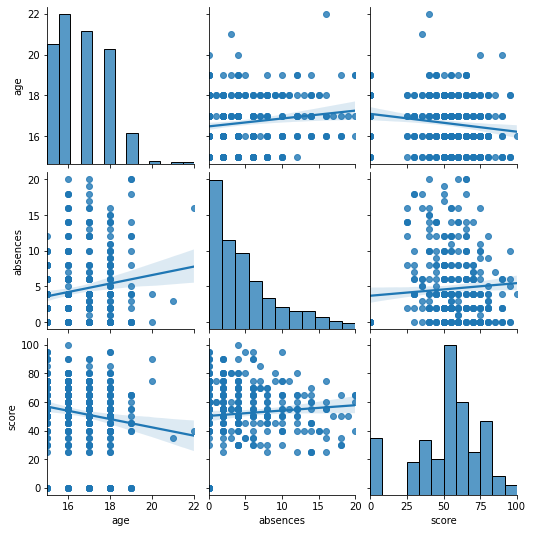

In [60]:
sns.pairplot(students.loc[:, quantitative_vars], kind='reg')

In [61]:
students.loc[:, quantitative_vars].corr()

age  absences     score
age       1.000000  0.151493 -0.159306
absences  0.151493  1.000000  0.081274
score    -0.159306  0.081274  1.000000

*There are no highly correlated explanatory variables - nothing to rule out.*

*There is a small (15%) positive correlation between age and the number of missed classes, which can be explained by the fact that older students start working and therefore have less time left to attend classes, as well as the fact that they become less dependent on parental control. There is also a slight (16%) negative correlation between age and the number of points, which may indicate that, for the above reasons, absences have a negative effect on the final score.*

#### Let us estimate the effect of categorical variables on the behavior of the target variable.

In [62]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize=(14, 4))
    sns.boxplot(x=column, y='score', data=students, ax=ax)
    ax.set_title('Boxplot for ' + column)
    plt.show()

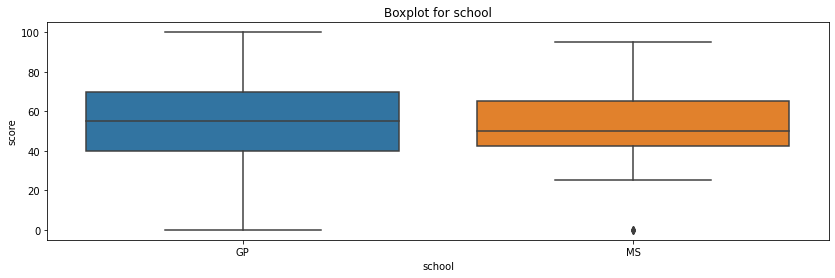

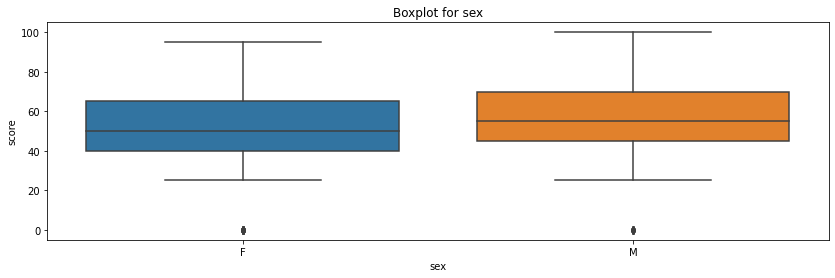

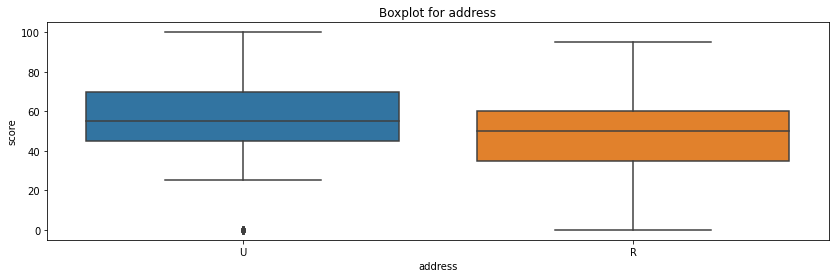

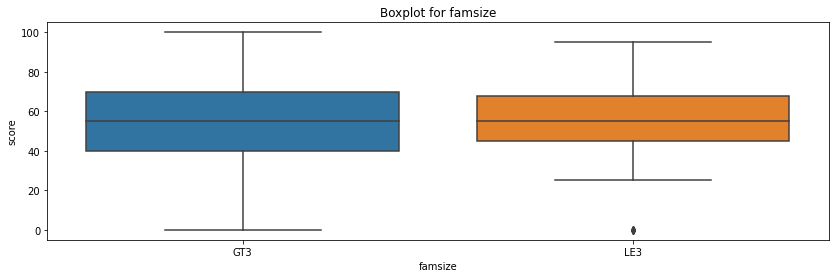

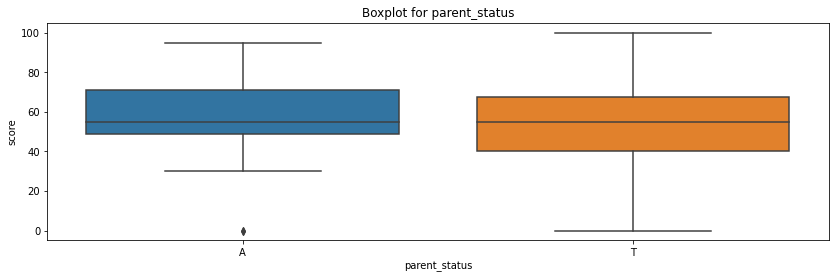

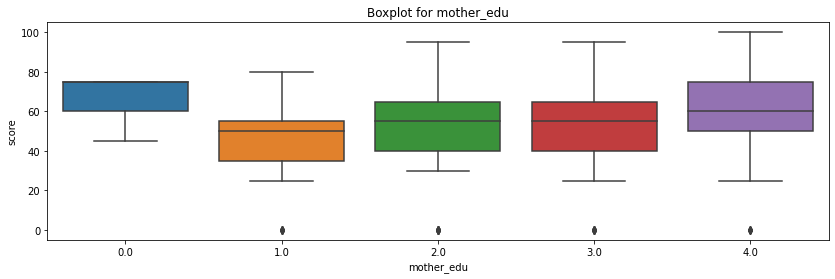

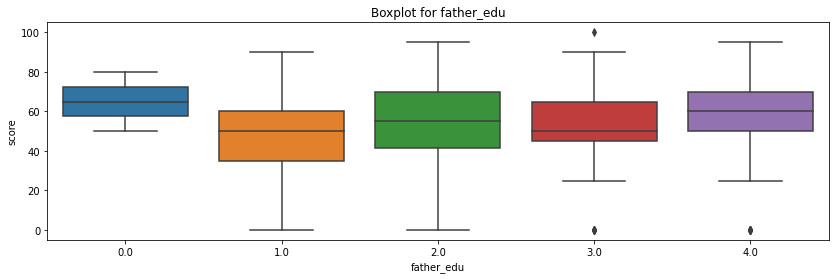

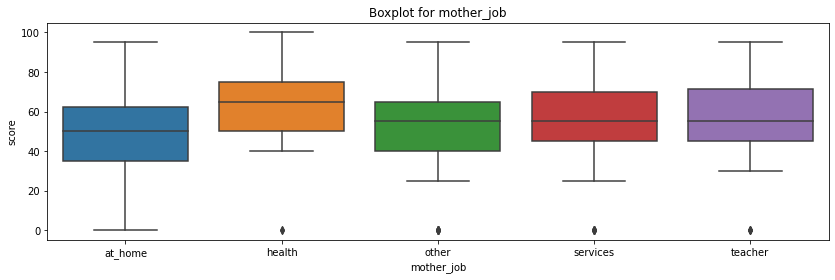

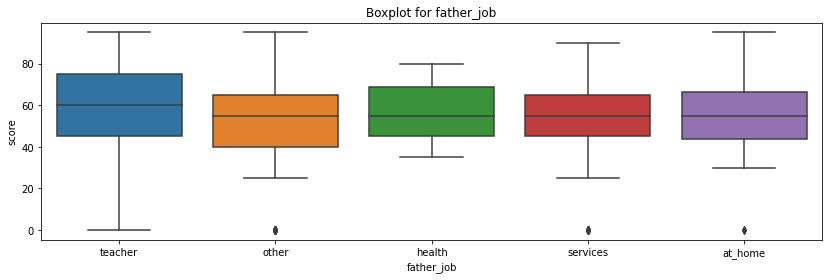

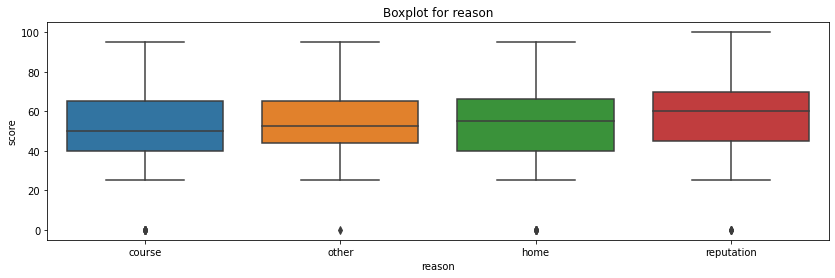

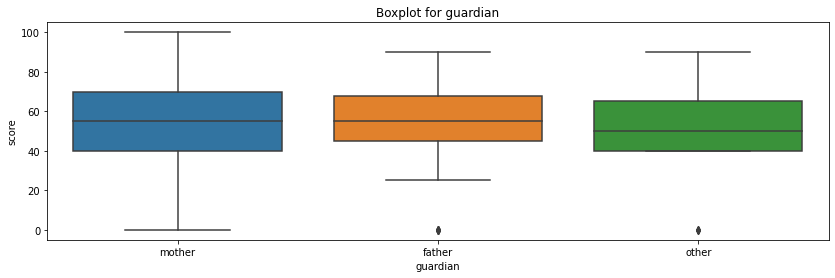

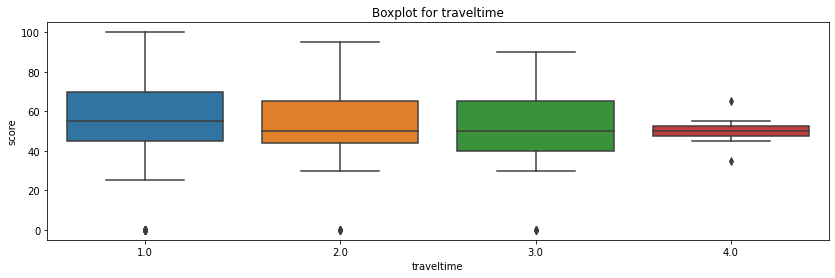

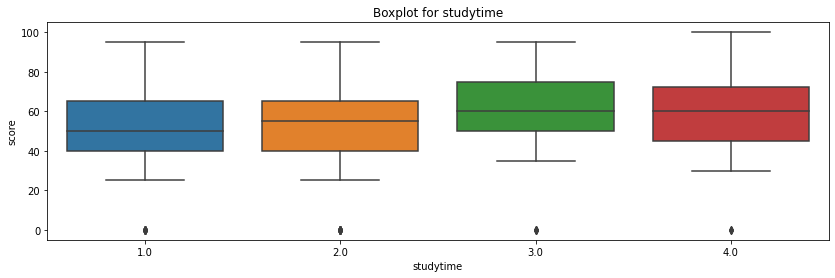

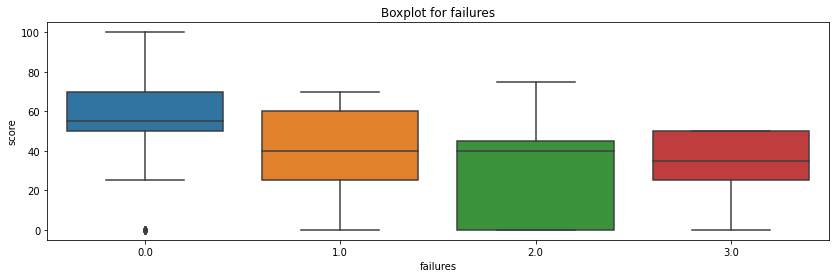

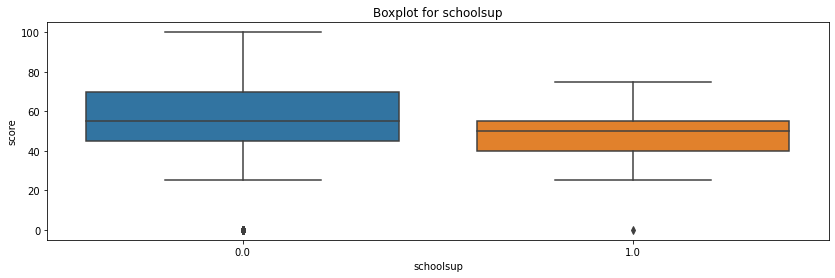

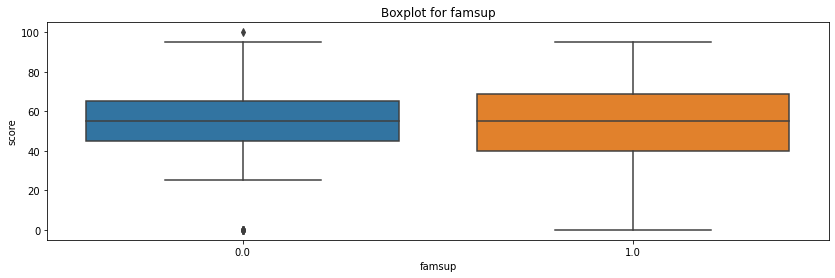

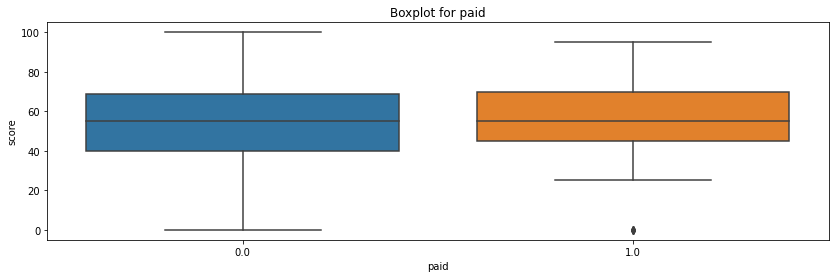

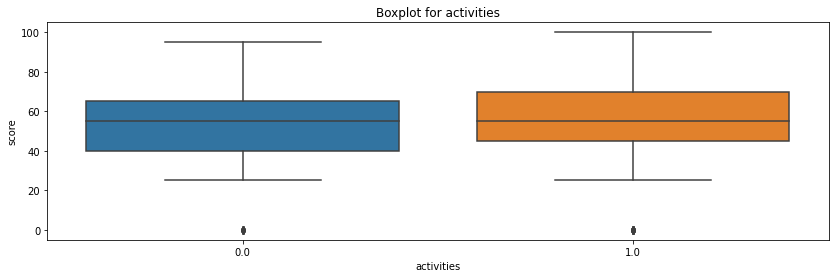

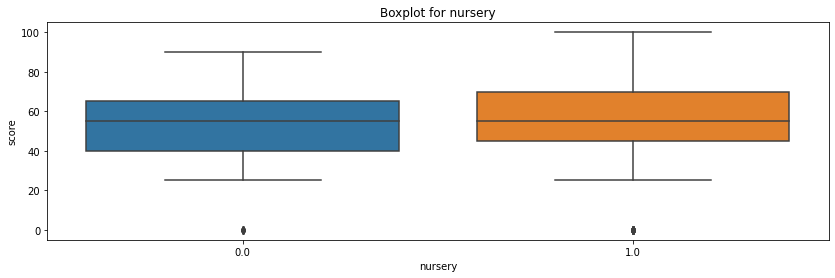

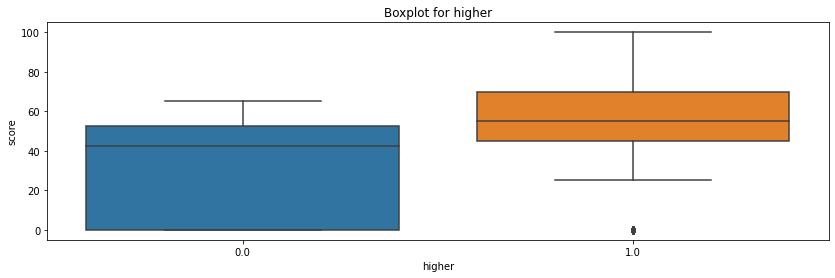

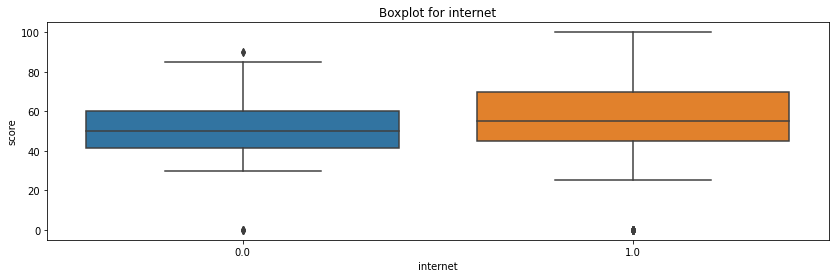

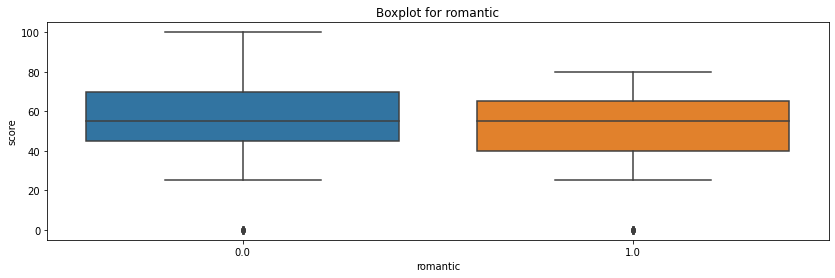

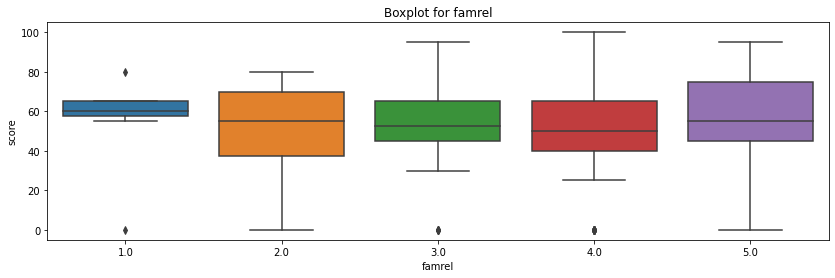

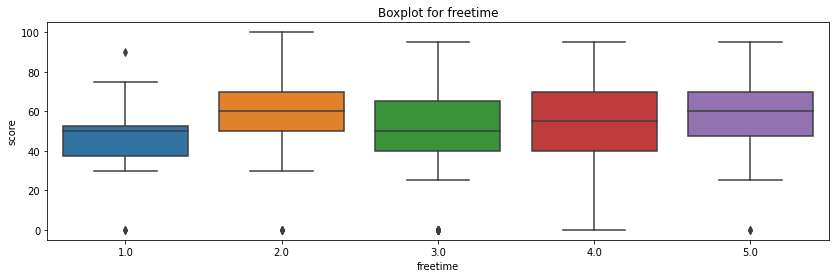

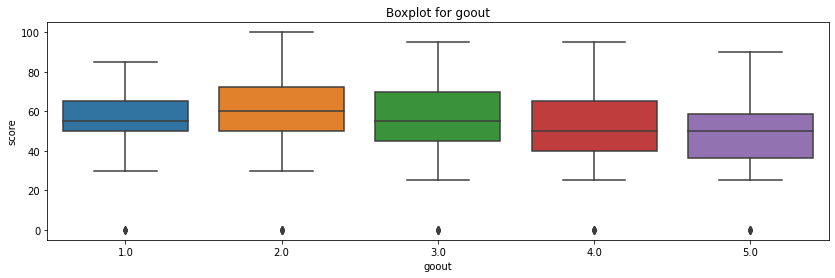

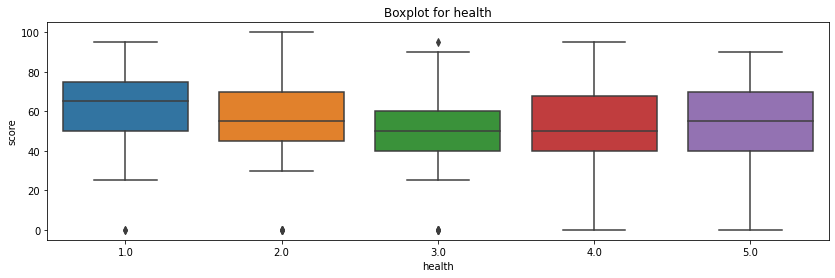

In [63]:
for col in categorical_vars:
    get_boxplot(col)

*Looking at the graph, it looks like the variables famsize, parent_status, famsup, paid, nursery, romantic do not affect the final score, while the others do.*

*Let's use statistics in order to get more specific results.*

In [64]:
from scipy.stats import ttest_ind


def get_stat_dif(column):
    '''Performs parwise T-test with the Bonferroni correction'''
    students_slice = students.loc[
        students[column].notna() & students['score'].notna(),
        [column, 'score']]
    cols = students_slice.loc[:, column].unique()
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(
            students_slice.loc[students_slice.loc[:, column]
                               == comb[0], 'score'],
            students_slice.loc[students_slice.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.05/len(combinations_all):  # Bonferroni correction
            print('Found statistically significant differences for the column:', column)
            break

In [65]:
for col in categorical_vars:
    get_stat_dif(col)

Found statistically significant differences for the column: sex
Found statistically significant differences for the column: address
Found statistically significant differences for the column: mother_edu
Found statistically significant differences for the column: mother_job
Found statistically significant differences for the column: failures
Found statistically significant differences for the column: paid
Found statistically significant differences for the column: higher
Found statistically significant differences for the column: romantic


*Well, not bad.*

*But, the Bonferroni Correction is known to be too strict to detect statistically significant differences. Let's check if we missed something else. For this we use a softer criterion - Tukey's honest significance test.*

In [66]:
from statsmodels.stats.multicomp import MultiComparison


def present_stat_diff_by_tukey(column):
    '''Perform parwise Tukey-test with alpha 0.05'''
    students_slice = students.loc[
        students[column].notna() & students['score'].notna(),
        [column, 'score']]
    MultiComp = MultiComparison(
        students_slice['score'], students_slice[column])
    if sum(MultiComp.tukeyhsd().reject) > 0:    # if there is even one difference
        return True
    else:
        return False

In [67]:
cols = []
for col in categorical_vars:
    if present_stat_diff_by_tukey(col):
        cols.append(col)
if cols:
    print('Tukey test found significant differences for this columns:', cols)
else:
    print('Tukey test not found any significant differences')

Tukey test found significant differences for this columns: ['sex', 'address', 'mother_edu', 'mother_job', 'failures', 'paid', 'higher', 'romantic', 'goout']


*Well, here's another variable - a 'goout'. As we expected, Tukey's test gave us more significant variables, albeit one.*

*Um, just a second... Why we use pairwise comparisons like the T-test or Tukey's test at all? They are post hoc and, generally speaking, should be applied after the differences are confirmed in ANOVA ... Moreover, in principle, we do not need these tests. We want to check if there are statistically significant differences for the group. To do this, it is enough to execute ANOVA. Let's see this.*

In [68]:
import scipy.stats as stats


def get_fisher_p_val(column):
    '''Performs ANOVA and get p-value for F-statistic'''
    students_slice = students.loc[
        students[column].notna() & students['score'].notna(),
        [column, 'score']]
    cols = students_slice.loc[:, column].unique()
    groups = [students_slice[students_slice[column] == col].score for col in cols]
    f_statistic, p_val = stats.f_oneway(*groups)
    return p_val

In [69]:
cols = []
for col in categorical_vars:
    if get_fisher_p_val(col) < 0.05:
        cols.append(col)
if cols:
    print('ANOVA found significant differences for this columns:', cols)
else:
    print('ANOVA not found any significant differences')

ANOVA found significant differences for this columns: ['sex', 'address', 'mother_edu', 'mother_job', 'failures', 'paid', 'higher', 'romantic', 'goout']


*Cool! The result is the same as Tukey's test! Well, that suits us perfectly.*

*It turns out that only 9 out of 26 categorical variables affect the final score.*

*Let's select these variables and our quantitative variables into a new dataframe for our future model.*

In [70]:
significant_variables = cols + quantitative_vars
students_for_model = students.loc[:, significant_variables]

In [71]:
students_for_model

sex address  mother_edu mother_job  failures  paid  higher  romantic  \
0     F       U         4.0    at_home       0.0   0.0     1.0       0.0   
1     F       U         1.0    at_home       0.0   0.0     1.0       0.0   
2     F       U         1.0    at_home       3.0   NaN     1.0       NaN   
3     F       U         4.0     health       0.0   1.0     1.0       1.0   
4     F       U         3.0      other       0.0   1.0     1.0       0.0   
..   ..     ...         ...        ...       ...   ...     ...       ...   
389   F       U         1.0      other       1.0   0.0     1.0       0.0   
391   M       U         3.0   services       0.0   0.0     1.0       0.0   
392   M       R         1.0      other       3.0   0.0     NaN       0.0   
393   M       R         3.0   services       0.0   0.0     1.0       0.0   
394   M       U         1.0      other       0.0   0.0     1.0       0.0   

     goout  age  absences  score  
0      4.0   18       6.0   30.0  
1      3.0   17       4.0   30.0  
2      2.0   15      10.0   50.0  
3      2.0   15       2.0   75.0  
4      2.0   16       4.0   50.0  
..     ...  ...       ...    ...  
389    1.0   18       0.0    0.0  
391    5.0   17       3.0   80.0  
392    3.0   21       3.0   35.0  
393    1.0   18       0.0   50.0  
394    3.0   19       5.0   45.0  

[366 rows x 12 columns]

### Results.

So, as a result of the EDA to analyze the impact of living conditions of aged students on their performance in mathematics, the following conclusions were obtained:

* There are few empty values in the data, the column showing the status of the parents is the least filled. 
* Found one column with a strange name - "'studytime, granular'". As it turned out, this column fully mirrors the "studytime" column, so the oddly named column was immediately excluded from the data.
* Outliers were found only in the missed class column, as well as a couple of anomalies in the parent education and marital relationship columns, suggesting that overall the data is fairly clean.
* The slight positive correlation between the variables age and absences and the slight negative correlation between the variables age and score may indicate that students spend less time attending classes as they get older, and this negatively affects the final score.
* The most important variables that are proposed to be used in the future for building a model are sex, address, mother_edu, mother_job, failures, paid, higher, romantic, goout, age and absences.